In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Car_Price.csv")

In [3]:
df.head()

Unnamed: 0                                  Car_name         History  \
0           0              2020 Maruti Swift LXI MANUAL  Non-Accidental   
1           1  2020 Maruti New Wagon-R LXI 1.0 L MANUAL  Non-Accidental   
2           2      2020 Maruti S PRESSO VXI PLUS MANUAL  Non-Accidental   
3           3           2014 Maruti Alto 800 VXI MANUAL  Non-Accidental   
4           4           2015 Maruti Alto K10 LXI MANUAL  Non-Accidental   

       Owner Kilometers_driven Fuel_type           Last_service  Transmission  \
0  1st Owner          3,570 km    Petrol   3,570km (6 Aug 2021)        MANUAL   
1  1st Owner          1,694 km    Petrol                 MANUAL  DL-8C-x-xxxx   
2  1st Owner         17,058 km    Petrol                 MANUAL  DL-3C-x-xxxx   
3  1st Owner          5,383 km    Petrol  5,383km (14 Mar 2021)        MANUAL   
4  1st Owner         10,957 km    Petrol  10,957km (9 Mar 2021)        MANUAL   

                        Insurance Year_of_purchase      Price  
0   Valid upto Feb 2022\nZero_Dep    February 2020  ₹5,80,799  
1                    October 2020                -  ₹4,96,399  
2                    January 2020                -  ₹4,37,299  
3  Valid upto Sep 2022\n3rd Party   September 2014  ₹2,91,699  
4  Valid upto Sep 2022\n3rd Party    February 2015  ₹2,95,299

In [4]:
df.columns

Index(['Unnamed: 0', 'Car_name', 'History', 'Owner', 'Kilometers_driven',
       'Fuel_type', 'Last_service', 'Transmission', 'Insurance',
       'Year_of_purchase', 'Price'],
      dtype='object')

In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
df.value_counts().sum()

2531

In [7]:
df["Car_name"].value_counts()

-                                           613
2013 Maruti Swift VDI MANUAL                 41
2015 Maruti Swift VDI ABS MANUAL             37
2012 Maruti Swift Dzire VDI BS IV MANUAL     33
2012 Maruti Swift VDI MANUAL                 33
                                           ... 
2017 Hyundai Xcent E PLUS MANUAL              1
2015 Maruti Swift LDI BS IV MANUAL            1
2015 Mahindra XUV500 W10 FWD                  1
2012 Toyota Etios Liva G SP MANUAL            1
2019 Maruti Ertiga ZDI PLUS MANUAL            1
Name: Car_name, Length: 975, dtype: int64

In [8]:
df["CarModelYear"]=df['Car_name'].str.split(" ",n=3,expand=True)[0]

In [9]:
df['CarCompany'] = df['Car_name'].str.split(" ",n=3,expand=True)[1]

In [10]:
df['CarModelType'] = df['Car_name'].str.split(" ",n=3,expand=True)[2]

In [11]:
df.drop('Car_name',axis=1,inplace=True)

In [12]:
df['History'].value_counts()

Non-Accidental    2446
-                  174
Name: History, dtype: int64

In [13]:
##all the cars are approximately nonaccidental so it wont make any impact on output so dropping feature

In [14]:
df.drop('History',axis=1,inplace=True)

In [15]:
df['Owner'].value_counts()

1st Owner    1947
2nd Owner     423
-             174
3rd Owner      71
4th Owner       5
Name: Owner, dtype: int64

In [16]:
df['Owner'].str.split("",n=2,expand=True)[1]

0       1
1       1
2       1
3       1
4       1
       ..
2615    1
2616    1
2617    2
2618    1
2619    1
Name: 1, Length: 2620, dtype: object

In [17]:
df['NoOfOwners'] = df['Owner'].str.split("",n=2,expand=True)[1]

In [18]:
df.drop('Owner',axis=1,inplace=True)

In [19]:
df['KmsDriven']=df['Kilometers_driven'].str.split(" ",n=1,expand=True)[0].str.replace(",","")

In [20]:
df.drop('Kilometers_driven',axis=1,inplace=True)

In [21]:
df['Fuel_type'].value_counts()

Petrol          1290
Diesel          1059
-                174
Petrol + CNG      97
Name: Fuel_type, dtype: int64

In [22]:
dictionary = {'Petrol':1,'Diesel':2,'Petrol + CNG':3,'-':1}

In [23]:
df.replace({'Fuel_type':dictionary},inplace=True)

In [24]:
df['Fuel_type'].value_counts()

1    1464
2    1059
3      97
Name: Fuel_type, dtype: int64

In [25]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [26]:
df["Last_service"].value_counts()

MANUAL                      646
-                           174
AUTOMATIC                    70
126,202km (16 Mar 2021)       1
80,413km (30 Jun 2021)        1
28,746km (19 May 2021)        1
58,078km (19 Mar 2021)        1
1,20,187km (17 Mar 2021)      1
10,554km (22 Jun 2021)        1
65,151km (6 Apr 2021)         1
90,722km (3 Jul 2021)         1
8,326km (26 Mar 2021)         1
80,239km (10 Jun 2021)        1
26,930km (7 Mar 2021)         1
66,799km (28 Jun 2021)        1
59,364km (24 Mar 2021)        1
1,04,810km (24 Jan 2021)      1
82,140km (2 Mar 2021)         1
1,49,244km (23 Apr 2021)      1
69,074km (14 Mar 2021)        1
99,245km (28 Mar 2021)        1
7,238km (27 Jun 2021)         1
130,814km (29 Jun 2021)       1
70,345km (21 Mar 2021)        1
2,41,361km (4 Apr 2021)       1
31,745km (9 Apr 2021)         1
66,364km (29 Jun 2021)        1
9,870km (27 Jun 2021)         1
113,174km (26 Apr 2021)       1
3,140km (1 Aug 2021)          1
15,895km (17 Jun 2021)        1
1,02,746

In [27]:
##in Last_service all values are unique and most of them are count of 1 howver we can use the month as all are in the same year

In [28]:
pd.set_option('display.max_rows', 10)

In [29]:
df['LastServiceMonth']=df['Last_service'].str.split(" ",n=3,expand=True)[2]

In [30]:
df['LastServiceMonth'].value_counts()

Mar    429
Apr    416
Jun    280
Jul    205
Feb    186
Jan     70
May     58
Aug     52
Name: LastServiceMonth, dtype: int64

In [31]:
dicti={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8}

In [32]:
df.replace({'LastServiceMonth':dicti},inplace=True)

In [33]:
df['LastServiceMonth'].value_counts()

3.0    429
4.0    416
6.0    280
7.0    205
2.0    186
1.0     70
5.0     58
8.0     52
Name: LastServiceMonth, dtype: int64

In [34]:
df.drop('Last_service',axis=1,inplace=True)

In [35]:
df['Transmission'].value_counts()

MANUAL          1524
-                174
AUTOMATIC        117
DL-8C-x-xxxx     117
HR-26-x-xxxx      69
                ... 
DL-3F-x-xxxx       1
UP-78-x-xxxx       1
HR-02-x-xxxx       1
HR-98-x-xxxx       1
UP-67-x-xxxx       1
Name: Transmission, Length: 58, dtype: int64

In [36]:
df['Transmission']=df['Transmission'].str.split("",n=10,expand=True)[9]

In [37]:
dicti={'None':'Manual','x':'Manual','C':'Automatic','MANUAL':'Manual'}

In [38]:
df.replace({'Transmission':dicti},inplace=True)

In [39]:
df['Transmission'].value_counts()

Manual       750
Automatic    117
Name: Transmission, dtype: int64

In [40]:
df['Transmission']=df['Transmission'].fillna(df['Transmission'].mode()[0])

In [41]:
df['Transmission'].value_counts()

Manual       2503
Automatic     117
Name: Transmission, dtype: int64

In [44]:
df.head()

Fuel_type Transmission                       Insurance Year_of_purchase  \
0          1       Manual   Valid upto Feb 2022\nZero_Dep    February 2020   
1          1       Manual                    October 2020                -   
2          1       Manual                    January 2020                -   
3          1       Manual  Valid upto Sep 2022\n3rd Party   September 2014   
4          1       Manual  Valid upto Sep 2022\n3rd Party    February 2015   

       Price CarModelYear CarCompany CarModelType NoOfOwners KmsDriven  \
0  ₹5,80,799         2020     Maruti        Swift          1      3570   
1  ₹4,96,399         2020     Maruti          New          1      1694   
2  ₹4,37,299         2020     Maruti            S          1     17058   
3  ₹2,91,699         2014     Maruti         Alto          1      5383   
4  ₹2,95,299         2015     Maruti         Alto          1     10957   

   LastServiceMonth  
0               8.0  
1               NaN  
2               NaN  
3               3.0  
4               3.0

In [45]:
df['Insurance'].value_counts()

Valid upto Sep 2022\n3rd Party      1231
-                                    174
Valid upto Jan 2022\nComp             58
Valid upto Feb 2022\nComp             50
Valid upto Mar 2022\nComp             37
                                    ... 
Valid upto Jan 2024\nThird_party       1
August 2009                            1
Valid upto Jul 2022\nComp              1
October 2011                           1
October 2009                           1
Name: Insurance, Length: 194, dtype: int64

In [46]:
df['Year_of_purchase'].value_counts()

-                924
January 2014      47
January 2013      41
January 2015      40
March 2013        29
                ... 
August 2008        1
December 2018      1
April 2008         1
November 2011      1
June 2020          1
Name: Year_of_purchase, Length: 159, dtype: int64

In [47]:
df['YearOfPurchase']=df['Year_of_purchase'].str.split(" ",n=1,expand=True)[1]

In [48]:
df.drop('Year_of_purchase',axis=1,inplace=True)

In [49]:
df['Price']=df['Price'].str.split('',n=2,expand=True)[2]

In [50]:
df['Price']=df['Price'].str.replace(',','')

In [51]:
df['CarModelYear'].replace('',2013,inplace=True)

In [52]:
df.head()

Fuel_type Transmission                       Insurance   Price  \
0          1       Manual   Valid upto Feb 2022\nZero_Dep  580799   
1          1       Manual                    October 2020  496399   
2          1       Manual                    January 2020  437299   
3          1       Manual  Valid upto Sep 2022\n3rd Party  291699   
4          1       Manual  Valid upto Sep 2022\n3rd Party  295299   

  CarModelYear CarCompany CarModelType NoOfOwners KmsDriven  LastServiceMonth  \
0         2020     Maruti        Swift          1      3570               8.0   
1         2020     Maruti          New          1      1694               NaN   
2         2020     Maruti            S          1     17058               NaN   
3         2014     Maruti         Alto          1      5383               3.0   
4         2015     Maruti         Alto          1     10957               3.0   

  YearOfPurchase  
0           2020  
1           None  
2           None  
3           2014  
4           2015

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_type         2620 non-null   int64  
 1   Transmission      2620 non-null   object 
 2   Insurance         2620 non-null   object 
 3   Price             2620 non-null   object 
 4   CarModelYear      2620 non-null   object 
 5   CarCompany        2007 non-null   object 
 6   CarModelType      2007 non-null   object 
 7   NoOfOwners        2620 non-null   object 
 8   KmsDriven         2620 non-null   object 
 9   LastServiceMonth  1696 non-null   float64
 10  YearOfPurchase    1696 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 225.3+ KB


In [54]:
##using label encoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
df2 = df.copy()

In [57]:
df2.head()

Fuel_type Transmission                       Insurance   Price  \
0          1       Manual   Valid upto Feb 2022\nZero_Dep  580799   
1          1       Manual                    October 2020  496399   
2          1       Manual                    January 2020  437299   
3          1       Manual  Valid upto Sep 2022\n3rd Party  291699   
4          1       Manual  Valid upto Sep 2022\n3rd Party  295299   

  CarModelYear CarCompany CarModelType NoOfOwners KmsDriven  LastServiceMonth  \
0         2020     Maruti        Swift          1      3570               8.0   
1         2020     Maruti          New          1      1694               NaN   
2         2020     Maruti            S          1     17058               NaN   
3         2014     Maruti         Alto          1      5383               3.0   
4         2015     Maruti         Alto          1     10957               3.0   

  YearOfPurchase  
0           2020  
1           None  
2           None  
3           2014  
4           2015

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_type         2620 non-null   int64  
 1   Transmission      2620 non-null   object 
 2   Insurance         2620 non-null   object 
 3   Price             2620 non-null   object 
 4   CarModelYear      2620 non-null   object 
 5   CarCompany        2007 non-null   object 
 6   CarModelType      2007 non-null   object 
 7   NoOfOwners        2620 non-null   object 
 8   KmsDriven         2620 non-null   object 
 9   LastServiceMonth  1696 non-null   float64
 10  YearOfPurchase    1696 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 225.3+ KB


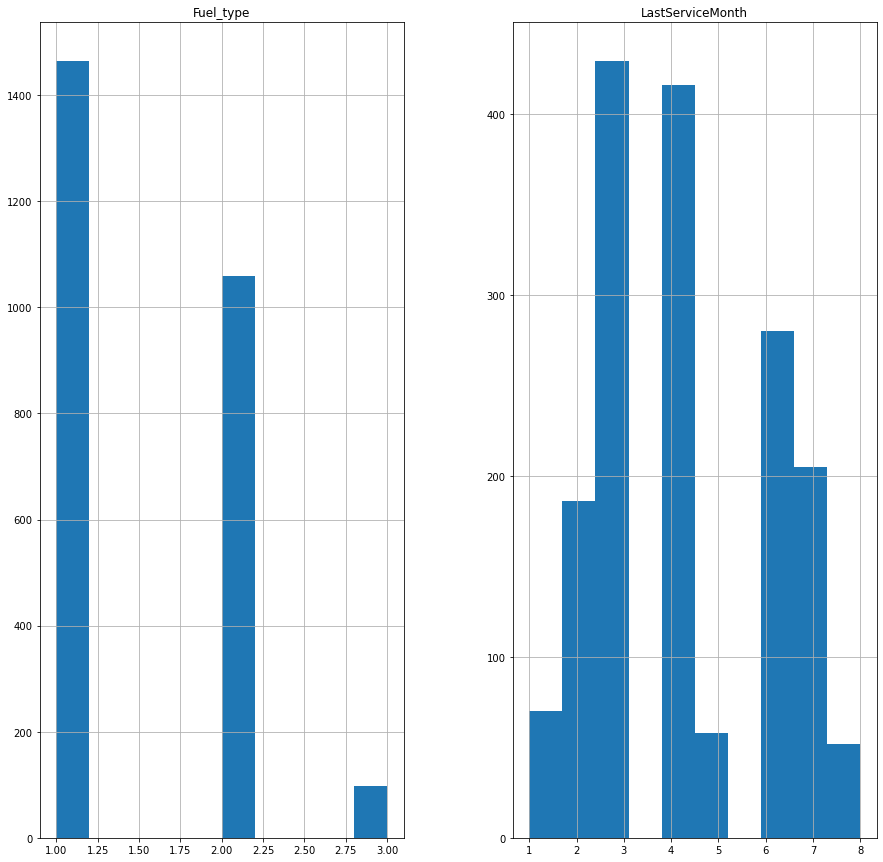

In [61]:
df2.hist(figsize=(15,15))
plt.show()

In [60]:
sns.pairplot(df2['Transmission'],df2['Price'])

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
df2.head()

Fuel_type Transmission                       Insurance   Price  \
0          1       Manual   Valid upto Feb 2022\nZero_Dep  580799   
1          1       Manual                    October 2020  496399   
2          1       Manual                    January 2020  437299   
3          1       Manual  Valid upto Sep 2022\n3rd Party  291699   
4          1       Manual  Valid upto Sep 2022\n3rd Party  295299   

  CarModelYear CarCompany CarModelType NoOfOwners KmsDriven  LastServiceMonth  \
0         2020     Maruti        Swift          1      3570               8.0   
1         2020     Maruti          New          1      1694               NaN   
2         2020     Maruti            S          1     17058               NaN   
3         2014     Maruti         Alto          1      5383               3.0   
4         2015     Maruti         Alto          1     10957               3.0   

  YearOfPurchase  
0           2020  
1           None  
2           None  
3           2014  
4           2015

In [62]:
df2['TransmissionEncoded']=le.fit_transform(df2['Transmission'])

In [63]:
df2['InsuranceEncoded']=le.fit_transform(df2['Insurance'])

In [64]:
df2['CarCompanyEncoded']=le.fit_transform(df2['CarCompany'])

In [65]:
df2['CarModelTypeEncoded']=le.fit_transform(df2['CarModelType'])

In [66]:
df2.drop(['Transmission','Insurance','CarCompany','CarModelType'],axis=1,inplace=True)

In [67]:
df2.head()

Fuel_type   Price CarModelYear NoOfOwners KmsDriven  LastServiceMonth  \
0          1  580799         2020          1      3570               8.0   
1          1  496399         2020          1      1694               NaN   
2          1  437299         2020          1     17058               NaN   
3          1  291699         2014          1      5383               3.0   
4          1  295299         2015          1     10957               3.0   

  YearOfPurchase  TransmissionEncoded  InsuranceEncoded  CarCompanyEncoded  \
0           2020                    1               154                 14   
1           None                    1               126                 14   
2           None                    1                58                 14   
3           2014                    1               187                 14   
4           2015                    1               187                 14   

   CarModelTypeEncoded  
0                   79  
1                   59  
2                   67  
3                    6  
4                    6

In [68]:
pd.set_option('display.max_rows', df2.shape[0]+1)

In [69]:
df2.isnull().sum()

Fuel_type                0
Price                    0
CarModelYear             0
NoOfOwners               0
KmsDriven                0
LastServiceMonth       924
YearOfPurchase         924
TransmissionEncoded      0
InsuranceEncoded         0
CarCompanyEncoded        0
CarModelTypeEncoded      0
dtype: int64

In [70]:
df2['LastServiceMonth']=df2['LastServiceMonth'].fillna(df2['LastServiceMonth'].mode()[0])

In [71]:
df2['YearOfPurchase']=df2['YearOfPurchase'].fillna(df2['YearOfPurchase'].mode()[0])

In [72]:
df2.isnull().sum()

Fuel_type              0
Price                  0
CarModelYear           0
NoOfOwners             0
KmsDriven              0
LastServiceMonth       0
YearOfPurchase         0
TransmissionEncoded    0
InsuranceEncoded       0
CarCompanyEncoded      0
CarModelTypeEncoded    0
dtype: int64

In [73]:
## all null values are removed

In [74]:
df3 = df2.copy()

In [75]:
df3.dropna(axis=0,inplace=True)

In [76]:
df3.shape

(2620, 11)

In [77]:
df2.shape

(2620, 11)

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fuel_type            2620 non-null   int64  
 1   Price                2620 non-null   object 
 2   CarModelYear         2620 non-null   object 
 3   NoOfOwners           2620 non-null   object 
 4   KmsDriven            2620 non-null   object 
 5   LastServiceMonth     2620 non-null   float64
 6   YearOfPurchase       2620 non-null   object 
 7   TransmissionEncoded  2620 non-null   int32  
 8   InsuranceEncoded     2620 non-null   int32  
 9   CarCompanyEncoded    2620 non-null   int32  
 10  CarModelTypeEncoded  2620 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 184.3+ KB


In [79]:
df2.describe()

Fuel_type  LastServiceMonth  TransmissionEncoded  InsuranceEncoded  \
count  2620.000000       2620.000000          2620.000000       2620.000000   
mean      1.478244          3.811450             0.955344        134.655344   
std       0.568943          1.574042             0.206588         66.341302   
min       1.000000          1.000000             0.000000          0.000000   
25%       1.000000          3.000000             1.000000         74.000000   
50%       1.000000          3.000000             1.000000        177.000000   
75%       2.000000          4.000000             1.000000        187.000000   
max       3.000000          8.000000             1.000000        193.000000   

       CarCompanyEncoded  CarModelTypeEncoded  
count        2620.000000          2620.000000  
mean           15.173664            61.972901  
std             6.334569            36.148104  
min             0.000000             0.000000  
25%            13.000000            26.000000  
50%            14.000000            79.000000  
75%            21.000000           102.000000  
max            24.000000           103.000000

In [80]:
import numpy as np

In [81]:
df2.replace("",np.NaN,inplace=True)

In [82]:
df2.replace("-",np.NaN,inplace=True)

In [83]:
df2.isnull().sum()

Fuel_type                0
Price                  807
CarModelYear           613
NoOfOwners             174
KmsDriven              174
LastServiceMonth         0
YearOfPurchase           0
TransmissionEncoded      0
InsuranceEncoded         0
CarCompanyEncoded        0
CarModelTypeEncoded      0
dtype: int64

In [84]:
df2['Price'] = df2['Price'].astype(float)
df2['CarModelYear'] = df2['CarModelYear'].astype(float)
df2['NoOfOwners'] = df2['NoOfOwners'].astype(float)
df2['KmsDriven'] = df2['KmsDriven'].astype(float)
df2['YearOfPurchase'] = df2['YearOfPurchase'].astype(float)

In [85]:
df2['Price']=df2['Price'].fillna(df2['Price'].median())
df2['CarModelYear']=df2['CarModelYear'].fillna(df2['CarModelYear'].mode()[0])
df2['NoOfOwners']=df2['NoOfOwners'].fillna(df2['NoOfOwners'].mode()[0])
df2['KmsDriven']=df2['KmsDriven'].fillna(df2['KmsDriven'].median())

In [69]:
df2

Fuel_type Transmission                       Insurance   Price  \
0             1       Manual   Valid upto Feb 2022\nZero_Dep  580799   
1             1       Manual                    October 2020  496399   
2             1       Manual                    January 2020  437299   
3             1       Manual  Valid upto Sep 2022\n3rd Party  291699   
4             1       Manual  Valid upto Sep 2022\n3rd Party  295299   
...         ...          ...                             ...     ...   
2615          2       Manual  Valid upto Sep 2022\n3rd Party  693599   
2616          3       Manual   Valid upto Dec 2021\nZero_Dep  278199   
2617          2    Automatic  Valid upto Sep 2022\n3rd Party  929199   
2618          2    Automatic  Valid upto Sep 2022\n3rd Party           
2619          2       Manual  Valid upto Sep 2022\n3rd Party           

     CarModelYear CarCompany CarModelType NoOfOwners KmsDriven  \
0            2020     Maruti        Swift          1      3570   
1            2020     Maruti          New          1      1694   
2            2020     Maruti            S          1     17058   
3            2014     Maruti         Alto          1      5383   
4            2015     Maruti         Alto          1     10957   
...           ...        ...          ...        ...       ...   
2615         2016     Maruti       Vitara          1    131010   
2616         2016     Maruti         Alto          1    122164   
2617         2012     Toyota     Fortuner          2    154591   
2618            -       None         None          1    140976   
2619            -       None         None          1    212989   

      LastServiceMonth YearOfPurchase  
0                  8.0           2020  
1                  NaN           None  
2                  NaN           None  
3                  3.0           2014  
4                  3.0           2015  
...                ...            ...  
2615               3.0           2016  
2616               3.0           2016  
2617               3.0           2012  
2618               4.0           2012  
2619               2.0           2012  

[2620 rows x 11 columns]

In [87]:
from scipy.stats import skew

In [88]:
##plotting distplot with skewness value

skewness value of Fuel_type  : 0.68868479644896




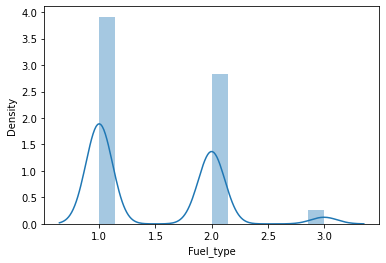

skewness value of Price  : 3.6046004583287052




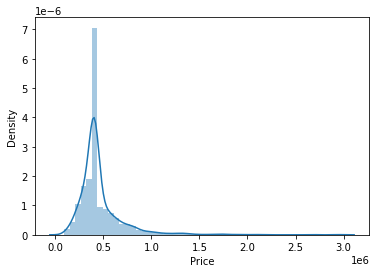

skewness value of CarModelYear  : 0.22035244863593578




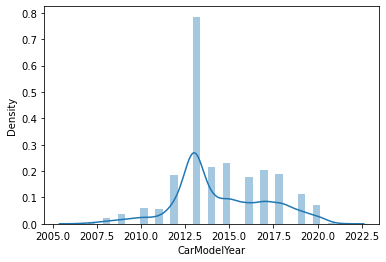

skewness value of NoOfOwners  : 2.246367696528898




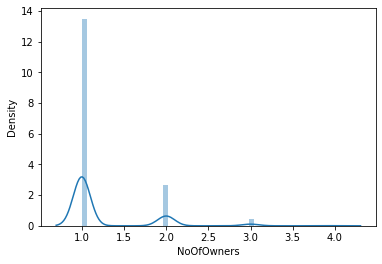

skewness value of KmsDriven  : 1.8076415270318829




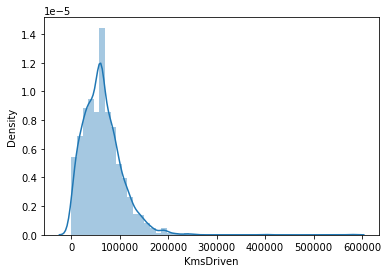

skewness value of LastServiceMonth  : 0.9908138181202926




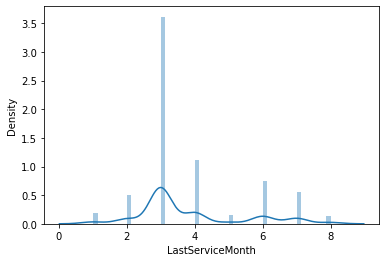

skewness value of YearOfPurchase  : 0.4561476929844665




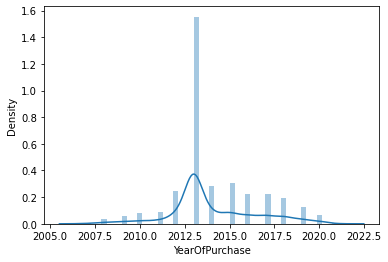

skewness value of TransmissionEncoded  : -4.409070911254842




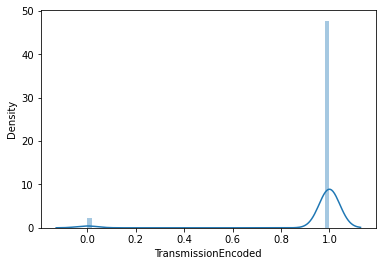

skewness value of InsuranceEncoded  : -0.8827235325001322




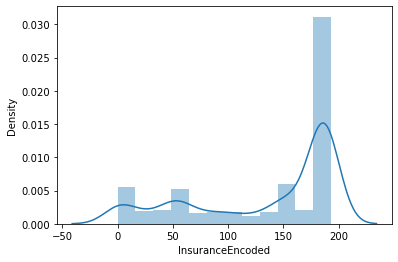

skewness value of CarCompanyEncoded  : 0.01974375991627666




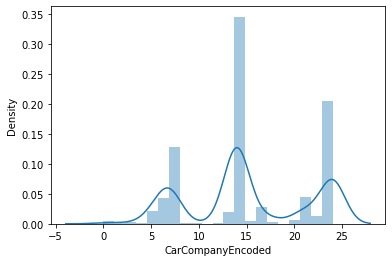

skewness value of CarModelTypeEncoded  : -0.29247427573466733




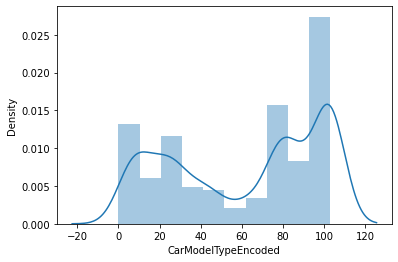

In [89]:
for i in df2.columns:
    print('skewness value of',i,' :',skew(df2[i]))
    print('\n')

    plt.figure()
    sns.distplot(df2[i])
    plt.show()

In [90]:
## most of the features have almost good skewness like fueltype ,carmodelyear,lastservicemonth,yearofpurchase while some have high skewness values which vil be handled alter

In [91]:
##checking linear trend with scatterplot

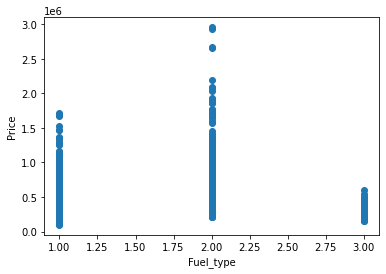

In [92]:
plt.scatter(df2['Fuel_type'],df2['Price'])
plt.xlabel('Fuel_type')
plt.ylabel('Price')
plt.show()

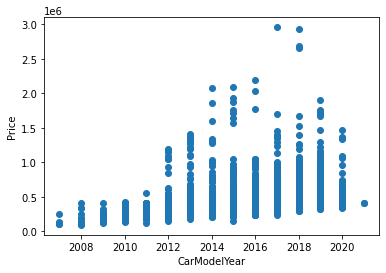

In [93]:
plt.scatter(df2['CarModelYear'],df2['Price'])
plt.xlabel('CarModelYear')
plt.ylabel('Price')
plt.show()

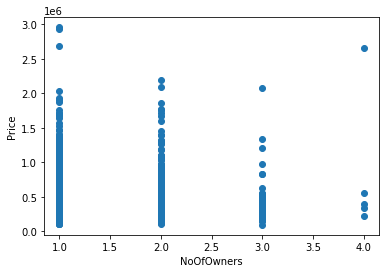

In [94]:
plt.scatter(df2['NoOfOwners'],df2['Price'])
plt.xlabel('NoOfOwners')
plt.ylabel('Price')
plt.show()

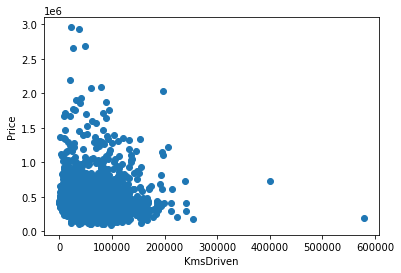

In [95]:
plt.scatter(df2['KmsDriven'],df2['Price'])
plt.xlabel('KmsDriven')
plt.ylabel('Price')
plt.show()

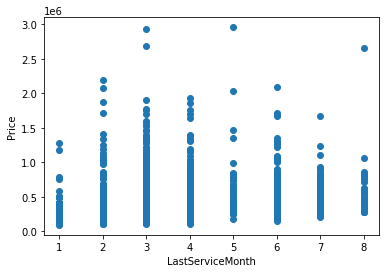

In [96]:
plt.scatter(df2['LastServiceMonth'],df2['Price'])
plt.xlabel('LastServiceMonth')
plt.ylabel('Price')
plt.show()

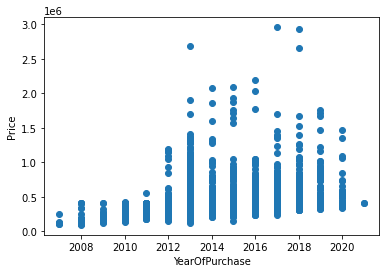

In [97]:
plt.scatter(df2['YearOfPurchase'],df2['Price'])
plt.xlabel('YearOfPurchase')
plt.ylabel('Price')
plt.show()

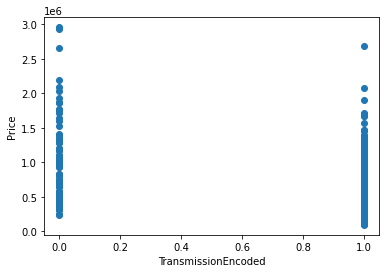

In [98]:
plt.scatter(df2['TransmissionEncoded'],df2['Price'])
plt.xlabel('TransmissionEncoded')
plt.ylabel('Price')
plt.show()

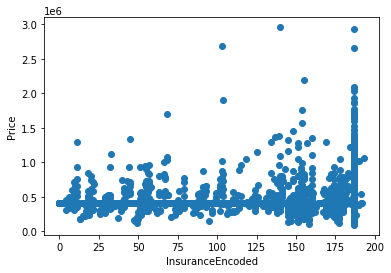

In [99]:
plt.scatter(df2['InsuranceEncoded'],df2['Price'])
plt.xlabel('InsuranceEncoded')
plt.ylabel('Price')
plt.show()

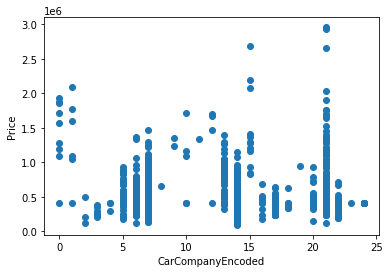

In [100]:
plt.scatter(df2['CarCompanyEncoded'],df2['Price'])
plt.xlabel('CarCompanyEncoded')
plt.ylabel('Price')
plt.show()

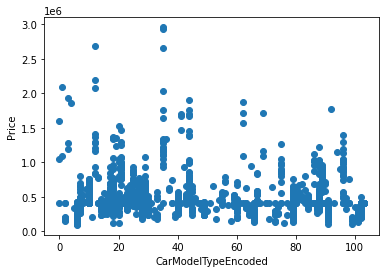

In [101]:
plt.scatter(df2['CarModelTypeEncoded'],df2['Price'])
plt.xlabel('CarModelTypeEncoded')
plt.ylabel('Price')
plt.show()

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_type         2620 non-null   int64  
 1   Transmission      2620 non-null   object 
 2   Insurance         2620 non-null   object 
 3   Price             2620 non-null   object 
 4   CarModelYear      2620 non-null   object 
 5   CarCompany        2007 non-null   object 
 6   CarModelType      2007 non-null   object 
 7   NoOfOwners        2620 non-null   object 
 8   KmsDriven         2620 non-null   object 
 9   LastServiceMonth  1696 non-null   float64
 10  YearOfPurchase    1696 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 225.3+ KB


In [102]:
##locating outliers using boxplots

<AxesSubplot:>

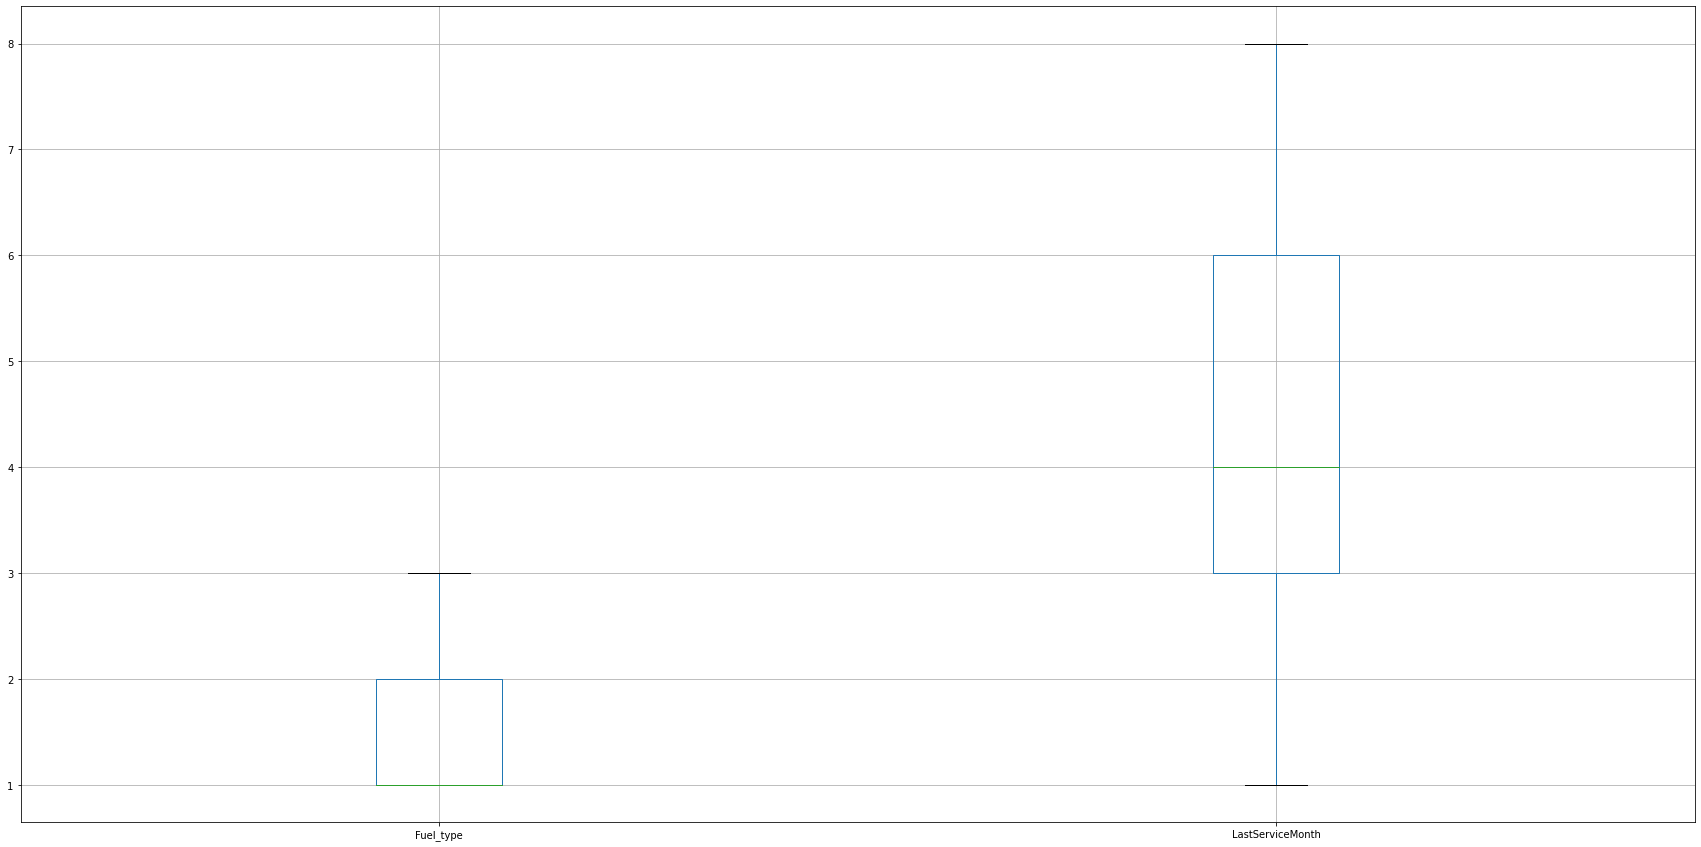

In [70]:
plt.figure(figsize=(30,15))
df3 = pd.DataFrame(data = df2, columns = df2.columns)
df3.boxplot()

In [104]:
#there are outliers in the data so removing them using zscore

In [105]:
pd.set_option('display.max_rows',15)

In [106]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
np.where(z>3)

(array([  11,   24,   85,  155,  162,  174,  178,  181,  200,  232,  233,
         234,  254,  342,  373,  387,  389,  428,  437,  459,  495,  538,
         541,  559,  571,  571,  591,  599,  602,  602,  608,  651,  652,
         675,  683,  683,  683,  709,  717,  722,  722,  723,  723,  727,
         743,  743,  751,  763,  812,  849,  855,  859,  864,  877,  884,
         902,  935,  935,  939,  954,  960,  963, 1008, 1009, 1014, 1065,
        1065, 1112, 1114, 1116, 1125, 1126, 1140, 1182, 1187, 1193, 1223,
        1223, 1229, 1232, 1232, 1259, 1285, 1299, 1310, 1325, 1325, 1326,
        1339, 1339, 1357, 1363, 1363, 1371, 1372, 1372, 1377, 1377, 1380,
        1380, 1382, 1386, 1401, 1402, 1402, 1403, 1405, 1411, 1411, 1412,
        1420, 1421, 1421, 1421, 1439, 1439, 1444, 1454, 1455, 1455, 1458,
        1460, 1464, 1466, 1468, 1475, 1481, 1482, 1482, 1484, 1484, 1491,
        1499, 1499, 1500, 1501, 1501, 1502, 1507, 1509, 1513, 1530, 1532,
        1565, 1574, 1575, 1576, 1578, 

In [107]:
len(np.where(z>3)[0])

279

In [108]:
df2.shape

(2620, 11)

In [109]:
df3=df2[(z<3).all(axis=1)]
df3.shape

(2384, 11)

In [110]:
df3.skew()

Fuel_type              0.718945
Price                  1.445538
CarModelYear           0.247913
NoOfOwners             1.879394
KmsDriven              0.571420
LastServiceMonth       1.052846
YearOfPurchase         0.508161
TransmissionEncoded    0.000000
InsuranceEncoded      -0.776980
CarCompanyEncoded      0.057865
CarModelTypeEncoded   -0.350333
dtype: float64

In [111]:
##skewness had reduced after removing outliers 

In [112]:
##finding correlation

<AxesSubplot:>

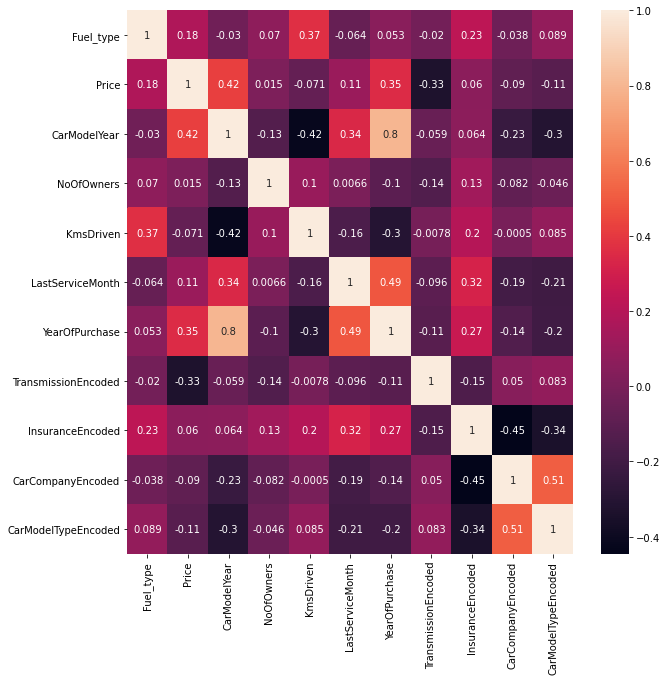

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)

In [114]:
##only YearOfPurhase and CarModelYear is showing good linear relation with price rest all features are showing not good relationship with price

In [115]:
x = df3.drop('Price',axis=1)
y = df3['Price']

In [508]:
##decision tree,random forest regressor and xgboost are giving ood results

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=reg.score(x_test,y_test)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [124]:
lg = LinearRegression()

In [125]:
max_acc_score(lg,x,y)

The accuracy score at r_state 42 is 0.2650907217576506
The accuracy score at r_state 43 is 0.4069546656998074
The accuracy score at r_state 44 is 0.299703464128528
The accuracy score at r_state 45 is 0.3177759504547414
The accuracy score at r_state 46 is 0.35883344221194113
The accuracy score at r_state 47 is 0.38693809959988845
The accuracy score at r_state 48 is 0.3446055421575758
The accuracy score at r_state 49 is 0.35389532022649095
The accuracy score at r_state 50 is 0.3377004516287484
The accuracy score at r_state 51 is 0.37099452860656135
The accuracy score at r_state 52 is 0.3762057835403607
The accuracy score at r_state 53 is 0.2818292671254532
The accuracy score at r_state 54 is 0.33622713336825005
The accuracy score at r_state 55 is 0.3903574990039892
The accuracy score at r_state 56 is 0.35839965616045855
The accuracy score at r_state 57 is 0.44053560368584244
The accuracy score at r_state 58 is 0.387066637139436
The accuracy score at r_state 59 is 0.3922798248235575
The a

0.44053560368584244

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=57)

In [514]:
lg = LinearRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
print(lg.score(x_train,y_train))
print(lg.score(x_test,y_test))
print(r2_score(y_test,y_pred_lg))

0.33093500806098564
0.44053560368584244
0.44053560368584244


In [521]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_train,y_train)
print(polyreg.score(x_train,y_train))
print(polyreg.score(x_test,y_test))

0.5319635614173228
0.5067967235493032


In [522]:
##polynomial regression of degree 3 is giving better results.

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [524]:
dtg = DecisionTreeRegressor()
params = {'criterion' :["mse", "friedman_mse", "mae",],
          'splitter':['best', 'random'],
          'min_samples_split':np.arange(1,10,2),
          'min_samples_leaf':np.arange(1,6)}
gcv_model = GridSearchCV(estimator=dtg,param_grid=params)
gcv_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 3, 5, 7, 9]),
                         'splitter': ['best', 'random']})

In [525]:
gcv_model.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'splitter': 'best'}

In [531]:
dtr_best = DecisionTreeRegressor(criterion='mse',min_samples_leaf=5,min_samples_split= 9,splitter='best')
dtr_best.fit(x_train,y_train)
y_preddtr = dtr_best.predict(x_test)
print(dtr_best.score(x_train,y_train))
print(dtr_best.score(x_test,y_test))
print('r2_score for decision tree regressor :',r2_score(y_test,y_preddtr))

0.7993409674701061
0.6567924622205735
r2_score for decision tree regressor : 0.6567924622205735


In [527]:
##decision tree regressor is giving better results

In [528]:
svr = SVR()
svr.fit(x_train,y_train)
y_predsvr = svr.predict(x_test)
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))
print('r2_score for SVR :',r2_score(y_test,y_predsvr))

-0.028250269638004033
-0.03749035685246893
r2_score for SVR : -0.03749035685246893


In [529]:
## svr is giving inappropriate results

In [530]:
knr = KNeighborsRegressor()
params_knr = {'n_neighbors' : np.arange(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knr_model = GridSearchCV(knr,params_knr)
knr_model.fit(x_train,y_train)
knr_model.best_params_

{'algorithm': 'auto', 'n_neighbors': 9}

In [540]:
knr_best = KNeighborsRegressor(n_neighbors=9,algorithm='auto')
knr_best.fit(x_train,y_train)
y_predknr = knr_best.predict(x_test)
print(knr_best.score(x_train,y_train))
print(knr_best.score(x_test,y_test))
print('r2_score for KNeighborsClassifier :',r2_score(y_test,y_predknr))

0.14248234687560213
-0.0727880269183303
r2_score for KNeighborsClassifier : -0.0727880269183303


In [533]:
##knr is also not giving appropriate results

In [534]:
##ensembling algos

In [535]:
from sklearn.ensemble import RandomForestRegressor

In [538]:
rfg = RandomForestRegressor()
params_rfg = {'n_estimators' : np.arange(100,120,2),
          'min_samples_split' : np.arange(1,10),
          'min_samples_leaf' : np.arange(1,5)}
rfg_model = GridSearchCV(rfg,params_rfg)
rfg_model.fit(x_train,y_train)
rfg_model.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 114}

In [541]:
rfg_best = RandomForestRegressor(min_samples_leaf= 1, min_samples_split= 5, n_estimators= 114)
rfg_best.fit(x_train,y_train)
y_predrfg = rfg_best.predict(x_test)
print(rfg_best.score(x_train,y_train))
print(rfg_best.score(x_test,y_test))
print('r2_score for RandomForestRegressor :',r2_score(y_test,y_predrfg))

0.9244267245740626
0.7493399583288947
r2_score for RandomForestRegressor : 0.7493399583288947


In [542]:
#RandomForestRegressor is givng good results

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
gbr=GradientBoostingRegressor()
params_gbr = {'n_estimators' : [100,110,120],
              'learning_rate' : [0.1,0.2,0.3,0.4,0.5]}
gbr_model = GridSearchCV(gbr,params_gbr)
gbr_model.fit(x_train,y_train)
gbr_model.best_params_

{'learning_rate': 0.3, 'n_estimators': 100}

In [129]:
gbr_best = GradientBoostingRegressor(learning_rate=0.3, n_estimators= 120)
gbr_best.fit(x_train,y_train)
y_predgbr = gbr_best.predict(x_test)
print('train_score :', gbr_best.score(x_train,y_train))
print('test_score:', gbr_best.score(x_test,y_test))
print('r2_score for GradientBoostRegressor :',r2_score(y_test,y_predgbr))

train_score : 0.8861876405386704
test_score: 0.7374147958634492
r2_score for GradientBoostRegressor : 0.7374147958634492


In [546]:
from xgboost import XGBRegressor

xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)
y_predxgbr = xgbr.predict(x_test)
print('train_score :', xgbr.score(x_train,y_train))
print('test_score:', xgbr.score(x_test,y_test))
print('r2_score for xgbregregressor :',r2_score(y_test,y_predxgbr))

train_score : 0.9872912423184057
test_score: 0.7640432336246594
r2_score for xgbregregressor : 0.7640432336246594


In [547]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor( learning_rate=0.01, n_estimators=150, random_state=50)
abr.fit(x_train,y_train)
y_predabr = abr.predict(x_test)
print('train_score :',abr.score(x_train,y_train))
print('test_score:', abr.score(x_test,y_test))
print('r2_score for xgbregregressor :',r2_score(y_test,y_predabr))


train_score : 0.45603211256070375
test_score: 0.5233902700870342
r2_score for xgbregregressor : 0.5233902700870342


In [132]:
##gradient booster is giving best results

In [133]:
import joblib
joblib.dump(gbr_best,'CarPricePrediction.csv')

['CarPricePrediction.csv']